In [2]:
#Installing specific version of plotly to avoid Invalid property for color error in recent version which needs change in layout
#!pip install plotly==2.7.0
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.plotly as py
import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
from sklearn.model_selection import train_test_split
import math
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.tools as tls
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

In [3]:
#Tying to predict pressure readings by buoy 44009
df = pd.read_csv('/Users/shreyabanerjee/DA_proj/clean_csvs/44065_clean.csv')

In [4]:
df['datetime'] = df['datetime'].astype('datetime64[ns]')
#x1 will have the readingd only for the month of august
x1=df.loc[ (df['month']==8)]
x=x1['pressure']
x_wind=x1['windspeed']
x_wave=x1['waveheight']
y=x1['datetime']

In [5]:
x.shape

(744,)

In [6]:
y.shape

(744,)

INFERENCE:
There are 744 readings for the month of August.

/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



(array([734350., 734354., 734358., 734362., 734366., 734370., 734374.,
        734378., 734381.]), <a list of 9 Text xticklabel objects>)

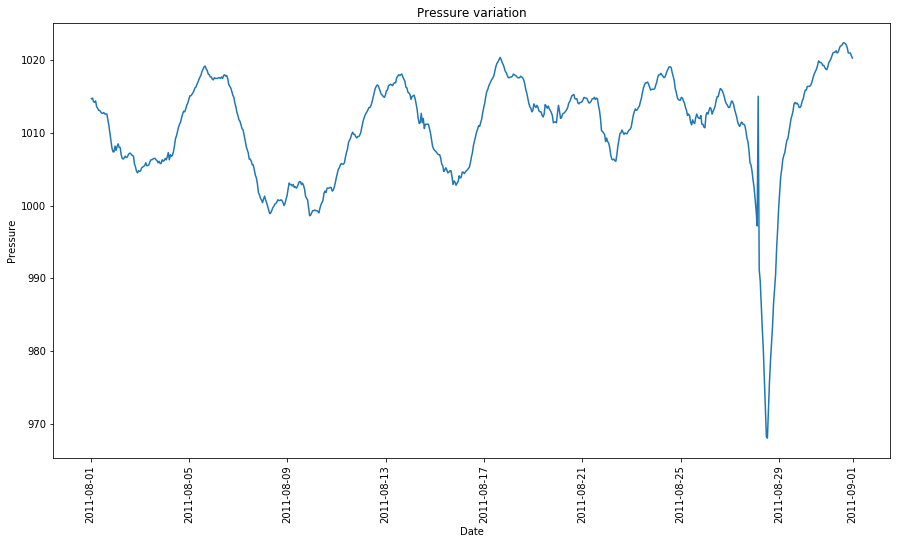

In [7]:
#visualising pressure varations for the month of August
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(y, x)
ax1.set_ylabel('Pressure')
ax1.set_xlabel('Date')
ax1.set_title("Pressure variation")
plt.xticks(rotation=90)

In [66]:
#Extract the values and apply log transform to stabilize the variance in the data 
#or to make it stationary before feeding it to the model.
actual_vals = x.values
test_date=y[-100:]
actual_log = np.log10(actual_vals)

In [9]:
#we'll train first 644 readings to predict the next 100 readings
train, test = actual_vals[0:644], actual_vals[-100:]

In [13]:
train_log, test_log = np.log10(train), np.log10(test)

In [14]:
#!pip install pyramid-arima
from pyramid.arima import auto_arima
stepwise_model = auto_arima(train_log, m=1,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=-9289.062, BIC=-9262.266, Fit time=0.376 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-9098.693, BIC=-9089.761, Fit time=0.343 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-9267.595, BIC=-9254.196, Fit time=0.324 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-9215.693, BIC=-9202.294, Fit time=0.546 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=-9291.031, BIC=-9268.700, Fit time=0.300 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-9292.952, BIC=-9275.087, Fit time=0.258 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-9283.523, BIC=-9261.192, Fit time=0.300 seconds
Total fit time: 2.448 seconds


In [17]:
#choosing the parameters with lowest AIC,BIC values
my_order = (0, 1, 0)
my_seasonal_order = (0, 0, 0, 1)

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/anaconda3/lib/python3.6/sit

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/anaconda3/lib/python3.6/sit

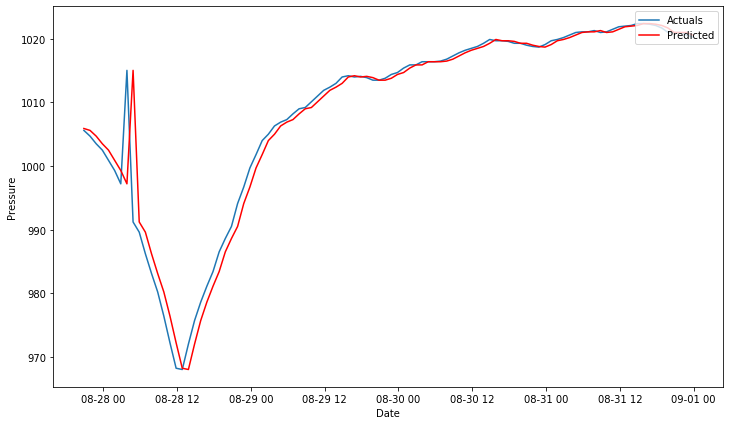

In [67]:
history = [x for x in train_log]
predictions = list()
predict_log=list()
for t in range(len(test_log)):
    try:
        model = sm.tsa.SARIMAX(history, order=my_order, seasonal_order=my_seasonal_order,enforce_stationarity=False,enforce_invertibility=False)
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        predict_log.append(output[0])
        yhat = 10**output[0]
        predictions.append(yhat)
        obs = test_log[t]
        history.append(obs)
    except:
        continue
figsize=(12, 7)
plt.figure(figsize=figsize)
plt.xlabel("Date")
plt.ylabel("Pressure")
pyplot.plot(test_date,test,label='Actuals')
pyplot.plot(test_date,predictions, color='red',label='Predicted')
pyplot.legend(loc='upper right')
pyplot.show()

(array([734350., 734354., 734358., 734362., 734366., 734370., 734374.,
        734378., 734381.]), <a list of 9 Text xticklabel objects>)

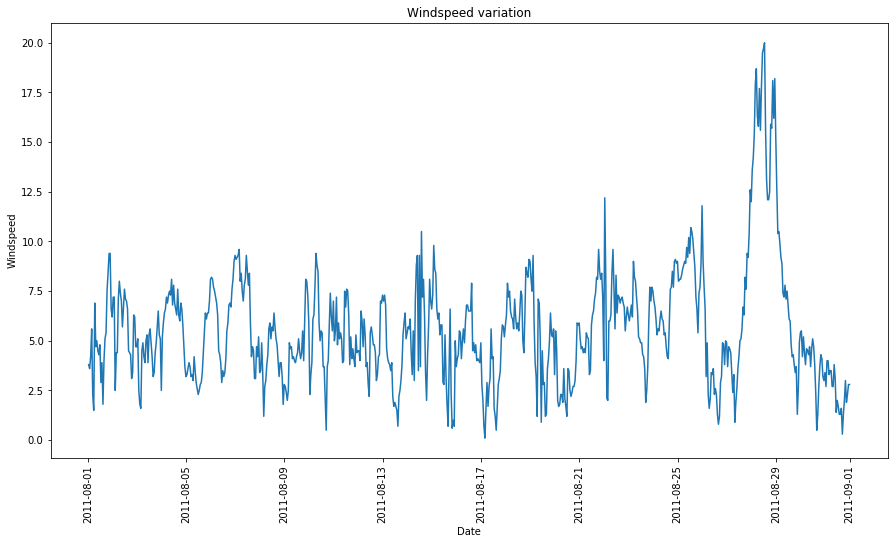

In [19]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(y, x_wind)
ax1.set_ylabel('Windspeed')
ax1.set_xlabel('Date')
ax1.set_title("Windspeed variation")
plt.xticks(rotation=90)

In [23]:
actual_vals_wind = x_wind.values

In [24]:
train_wind, test_wind = actual_vals_wind[0:644], actual_vals_wind[-100:]
train_log_wind, test_log_wind = np.log10(train_wind), np.log10(test_wind)

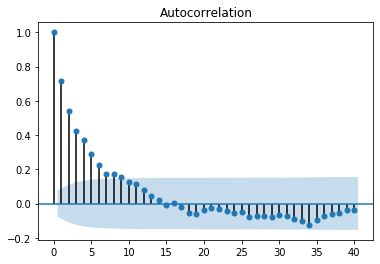

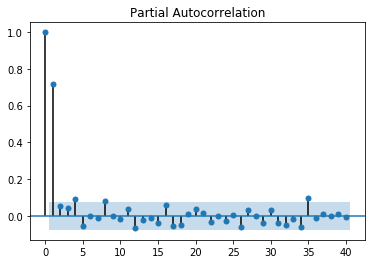

In [41]:
sm.graphics.tsa.plot_acf(train_log_wind.squeeze(), lags=40)
plt.show()

sm.graphics.tsa.plot_pacf(train_log_wind.squeeze(), lags=40)
plt.show()


In [40]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(train_log_wind, m=1,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=-506.606, BIC=-479.809, Fit time=1.160 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-421.567, BIC=-412.635, Fit time=0.082 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-441.675, BIC=-428.276, Fit time=0.151 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-452.706, BIC=-439.307, Fit time=0.179 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=-509.352, BIC=-487.021, Fit time=0.979 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-504.533, BIC=-486.669, Fit time=0.480 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=-508.300, BIC=-481.503, Fit time=1.026 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=-504.096, BIC=-472.833, Fit time=1.236 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=-472.321, BIC=-454.457, Fit time=0.253 seconds
Total fit time: 5.548 seconds


In [56]:
#choosing the parameters with lowest AIC,BIC values
my_order = (0, 1, 0)
my_seasonal_order = (0, 0, 0, 1)

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/anaconda3/lib/python3.6/sit

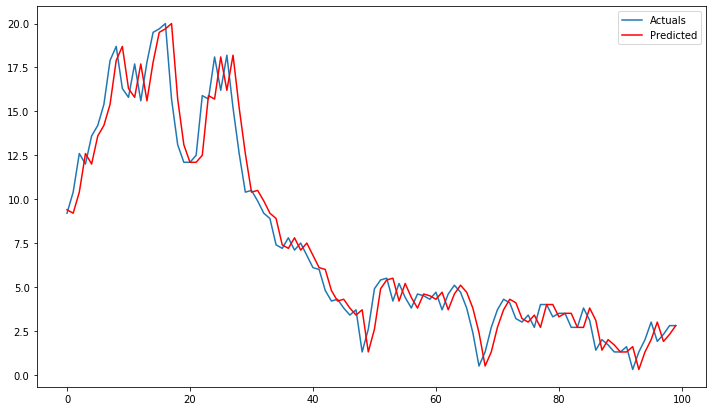

In [57]:
history_wind = [x for x in train_log_wind]
predictions_wind = list()
predict_log_wind=list()
for t in range(len(test_log_wind)):
    model = sm.tsa.SARIMAX(history_wind, order=my_order, seasonal_order=my_seasonal_order,enforce_stationarity=False,enforce_invertibility=False)
    model_fit = model.fit(disp=0)
    output_wind = model_fit.forecast()
    predict_log_wind.append(output_wind[0])
    yhat = 10**output_wind[0]
    predictions_wind.append(yhat)
    obs = test_log_wind[t]
    history_wind.append(obs)
figsize=(12, 7)
plt.figure(figsize=figsize)
pyplot.plot(test_wind,label='Actuals')
pyplot.plot(predictions_wind, color='red',label='Predicted')
pyplot.legend(loc='upper right')
pyplot.show()

In [58]:
predicted_df=pd.DataFrame()
predicted_df['datetime']=y[-100:]
predicted_df['actual_pressure']=test
predicted_df['predicted_pressure']=predictions
predicted_df['actual_windspeed']=test_wind
predicted_df['predicted_windspeed']=predictions_wind
predicted_df.reset_index(inplace=True)
del predicted_df['index']
predicted_df.head()

,datetime,actual_pressure,predicted_pressure,actual_windspeed,predicted_windspeed
0,2011-08-27 20:50:00,1005.6,1005.9,9.2,9.4
1,2011-08-27 21:50:00,1004.7,1005.6,10.4,9.2
2,2011-08-27 22:50:00,1003.5,1004.7,12.6,10.4
3,2011-08-27 23:50:00,1002.5,1003.5,12.0,12.6
4,2011-08-28 00:50:00,1000.9,1002.5,13.6,12.0


In [59]:
predicted_df.to_csv("predicted.csv")